In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from math import sqrt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

# pasajeros

## limpieza

In [2]:
#leer base de datos
flights = pd.read_csv('C:\\Users\\axelm\\OneDrive\\Documentos\\python\\datathon_2024\\Filghts TEC_Valid.csv')
flights

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0
245749,ef32da2731db80faa8b9f5030979a016,9H-MLV,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN,NaN
245750,9c8970e9836d9c5ef9415bfa93c3f408,XA-VAC,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,95.0
245751,3c15779202b13158f78e8a8afe377250,NaN,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN,NaN


In [3]:
#revisar nan
flights.isna().sum()

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64

In [4]:
#dropeamos id, aeronave y bookings, ya que no son columnas necesarias para realizar la predicción de passengers (bookings termina estando en función del resto de las columnas)
fdf = flights.drop(columns = ['Flight_ID', 'Aeronave', 'Bookings'])
fdf

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0
...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN


In [5]:
#revisar nan en el nuevo df
fdf.isna().sum()

DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
dtype: int64

In [6]:
#revisar las filas con nan
fdf[fdf['DepartureStation'].isna()]

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
173981,NaN,BA,Ciudad Principal,NaN,2023-10-22 20:15:00,2023-10-22 22:05:00,186,47.0


In [7]:
#revisar las filas con nan
fdf[fdf['ArrivalStation'].isna()]

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
1876,BA,NaN,NaN,Ciudad Principal,2023-10-21 15:55:00,2023-10-21 17:30:00,186,42.0


In [8]:
#dropear los nan (2 filas, no son significantes)
fdf = fdf.dropna(subset = ['DepartureStation', 'ArrivalStation'])
fdf

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0
...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN


In [9]:
#redondear horas
fdf['STD'] = pd.to_datetime(fdf['STD'])
fdf['STA'] = pd.to_datetime(fdf['STA'])

fdf['STD'] = fdf['STD'].dt.floor('H')
fdf['STA'] = fdf['STA'].dt.floor('H')
fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\1739293748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STD'] = pd.to_datetime(fdf['STD'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\1739293748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STA'] = pd.to_datetime(fdf['STA'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\1739293748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:00:00,2023-10-19 14:00:00,240,229.0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:00:00,2023-07-03 04:00:00,186,197.0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:00:00,2023-06-26 15:00:00,220,200.0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:00:00,2023-02-10 09:00:00,186,162.0
...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:00:00,2023-12-29 14:00:00,240,189.0
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:00:00,2024-04-20 14:00:00,178,NaN
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:00:00,2023-12-22 16:00:00,180,163.0
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:00:00,240,NaN


In [10]:
#separamos las fechas en dos columnas: día y hora

fdf['STD'] = pd.to_datetime(fdf['STD'])
fdf['STA'] = pd.to_datetime(fdf['STA'])

fdf['Date_STD'] = fdf['STD'].dt.date
fdf['Time_STD'] = fdf['STD'].dt.time

fdf['Date_STA'] = fdf['STA'].dt.date
fdf['Time_STA'] = fdf['STA'].dt.time

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\3160707690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STD'] = pd.to_datetime(fdf['STD'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\3160707690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STA'] = pd.to_datetime(fdf['STA'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\3160707690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:00:00,2023-10-19 14:00:00,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:00:00,2023-07-03 04:00:00,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:00:00,2023-06-26 15:00:00,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:00:00,2023-02-10 09:00:00,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:00:00,2023-12-29 14:00:00,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:00:00,2024-04-20 14:00:00,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:00:00,2023-12-22 16:00:00,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:00:00,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00


In [11]:
# Se determinó si es temporada alta con el calendario escolar de México
# Función para determinar si la fecha es temporada alta
def is_high_season(date):
    year = date.year
        #verano, asueto revolución, invierno, asueto constitución, asueto petróleo
    if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
       (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
       (pd.Timestamp(year=year, month=12, day=18) <= date <= pd.Timestamp(year=year+1, month=1, day=5)) or \
       (pd.Timestamp(year=year, month=2, day=3) <= date <= pd.Timestamp(year=year, month=2, day=5)) or \
       (pd.Timestamp(year=year, month=3, day=16) <= date <= pd.Timestamp(year=year, month=3, day=18)):
        return 1
    if year == 2024 and (pd.Timestamp(year=2024, month=3, day=25) <= date <= pd.Timestamp(year=2024, month=4, day=7)):
        return 1
    if year == 2023 and (pd.Timestamp(year=2023, month=4, day=1) <= date <= pd.Timestamp(year=2023, month=4, day=16)):
        return 1
    return 0

In [12]:
# Aplicar la función a la columna STD para crear una nueva columna 'Temporada_Alta'
fdf['Temporada_Alta'] = fdf['Date_STD'].apply(is_high_season)

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\2547166302.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\2547166302.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\2547166302.py:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standa

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA,Temporada_Alta
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:00:00,2023-10-19 14:00:00,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00,0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:00:00,2023-07-03 04:00:00,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00,0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00,0
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:00:00,2023-06-26 15:00:00,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00,0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:00:00,2023-02-10 09:00:00,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:00:00,2023-12-29 14:00:00,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00,1
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:00:00,2024-04-20 14:00:00,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00,0
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:00:00,2023-12-22 16:00:00,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00,1
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:00:00,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00,0


In [13]:
#crear columna de meses
fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])
fdf['Date_STA'] = pd.to_datetime(fdf['Date_STA'])

fdf['Month_STD'] = fdf['Date_STD'].dt.month
fdf['Month_STA'] = fdf['Date_STA'].dt.month

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\730570003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\730570003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date_STA'] = pd.to_datetime(fdf['Date_STA'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\730570003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA,Temporada_Alta,Month_STD,Month_STA
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:00:00,2023-10-19 14:00:00,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00,0,10,10
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:00:00,2023-07-03 04:00:00,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00,0,7,7
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00,0,2,2
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:00:00,2023-06-26 15:00:00,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00,0,6,6
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:00:00,2023-02-10 09:00:00,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:00:00,2023-12-29 14:00:00,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00,1,12,12
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:00:00,2024-04-20 14:00:00,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00,0,4,4
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:00:00,2023-12-22 16:00:00,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00,1,12,12
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:00:00,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00,0,10,10


In [14]:
fecha = pd.to_datetime('2024-01-01')
fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])

fdf[fdf['Date_STD'] >= '2024-01-01'].isna().sum()

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\2607763696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])


DepartureStation         0
ArrivalStation           0
Destination_Type         0
Origin_Type              0
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Date_STD                 0
Time_STD                 0
Date_STA                 0
Time_STA                 0
Temporada_Alta           0
Month_STD                0
Month_STA                0
dtype: int64

In [15]:
fdf[fdf['Date_STD'] < '2024-01-01'].isna().sum()

DepartureStation    0
ArrivalStation      0
Destination_Type    0
Origin_Type         0
STD                 0
STA                 0
Capacity            0
Passengers          0
Date_STD            0
Time_STD            0
Date_STA            0
Time_STA            0
Temporada_Alta      0
Month_STD           0
Month_STA           0
dtype: int64

In [16]:
#crear columnas dummies y eliminar las fechas completas
fdfm = pd.get_dummies(fdf, columns=['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type'])
fdfm = fdfm.drop(columns = ['Date_STD', 'Date_STA'])

#dejar solamente el número de la hora
fdfm['Time_STD'] = pd.to_datetime(fdfm['Time_STD'], format='%H:%M:%S').dt.hour
fdfm['Time_STA'] = pd.to_datetime(fdfm['Time_STA'], format='%H:%M:%S').dt.hour

fdfm

,STD,STA,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa
0,2023-10-19 11:00:00,2023-10-19 14:00:00,240,229.0,11,14,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2023-07-03 00:00:00,2023-07-03 04:00:00,186,197.0,0,4,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN,17,17,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2023-06-26 15:00:00,2023-06-26 15:00:00,220,200.0,15,15,0,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2023-02-10 08:00:00,2023-02-10 09:00:00,186,162.0,8,9,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245748,2023-12-29 07:00:00,2023-12-29 14:00:00,240,189.0,7,14,1,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
245749,2024-04-20 10:00:00,2024-04-20 14:00:00,178,NaN,10,14,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
#crear csv de base de datos limpia
fdfm.to_csv('BaseParaModelo.csv', index=False)

## modelos (utilizar 80-20)

In [99]:
#el conjunto de datos que se utilizará para entrenar el modelo son los del año 2023 (no contienen nan)
df = fdfm.dropna()
df = df.sort_values(by = 'STD')
df = df.reset_index()
df.drop(columns = 'index', inplace = True)

df

,STD,STA,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa
0,2023-01-02 00:00:00,2023-01-02 02:00:00,240,168.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2023-01-02 00:00:00,2023-01-02 06:00:00,186,170.0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2023-01-02 00:00:00,2023-01-02 05:00:00,186,185.0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,2023-01-02 00:00:00,2023-01-02 05:00:00,186,120.0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2023-01-02 01:00:00,2023-01-02 06:00:00,186,165.0,1,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122221,2023-12-31 23:00:00,2024-01-01 04:00:00,186,131.0,23,4,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
122222,2023-12-31 23:00:00,2024-01-01 04:00:00,186,168.0,23,4,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

### Linear regression (training and testing)

In [100]:
#preparar los datos para el modelo
X = df.drop(['STD', 'STA', 'Passengers'], axis=1)
y = df['Passengers']

#creación de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

#predecir los valores
df_test = df[int(122226 * 0.8):].reset_index()
df_test['Predicted_Passengers'] = model.predict(X_test)

df_test[['Passengers', 'Predicted_Passengers']]

,Passengers,Predicted_Passengers
0,149.0,184.572673
1,182.0,189.253027
2,240.0,174.103677
3,209.0,193.415947
4,171.0,198.599782
...,...,...
24441,131.0,213.797411
24442,168.0,208.301798
24443,217.0,190.431978
24444,201.0,218.080376


In [101]:
predictions = model.predict(X_test)
accurate_predictions = np.abs(y_test - predictions) <= y_test * 0.10
accuracy = np.mean(accurate_predictions)

accuracy

0.5364067741143745

In [102]:
#evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f"MSE: {mse}")

MSE: 807.2798114875643


In [143]:
r2_test = model.score(X_test, y_test)
r2_test

0.42797926667115727

### Linear regression (forecasting)

In [130]:
df_future = fdfm[fdfm['Passengers'].isna()].drop(columns = ['STD', 'STA'])
df_future.reset_index(inplace = True)
df_future.drop(columns = 'index', inplace = True)
df_future

,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa
0,220,NaN,17,17,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,186,NaN,8,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,180,NaN,14,16,0,5,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,186,NaN,10,13,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,240,NaN,0,4,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123520,186,NaN,6,10,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
123521,186,NaN,11,15,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
123522,178,NaN,10,14,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
123523,240,NaN,10,1

In [131]:
df_future['Predicted_Passengers'] = model.predict(df_future.drop(columns = 'Passengers'))
df_future.drop(columns = 'Passengers', inplace = True)
df_future

,Capacity,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa,Predicted_Passengers
0,220,17,17,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,172.988815
1,186,8,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,141.569645
2,180,14,16,0,5,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,158.715631
3,186,10,13,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,185.359577
4,240,0,4,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,185.826521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123520,186,6,10,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,146.896068
123521,186,11,15,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,154.529542
123522,178,10,14,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Linear regression (gráficas)

#### por hora

In [132]:
df_graph = df['STD'][int(122226 * 0.8):].reset_index()
df_graph['Passengers'] = df_test['Passengers']
df_graph['Predicted_Passengers'] = df_test['Predicted_Passengers']
df_graph.sort_values('STD', inplace=True)
df_graph.reset_index(inplace = True)

df_graph.drop(columns = ['index', 'level_0'], inplace=True)

df_graph

,STD,Passengers,Predicted_Passengers
0,2023-10-25 14:00:00,149.0,184.572673
1,2023-10-25 14:00:00,182.0,189.253027
2,2023-10-25 14:00:00,240.0,174.103677
3,2023-10-25 14:00:00,209.0,193.415947
4,2023-10-25 15:00:00,157.0,141.276109
...,...,...,...
24441,2023-12-31 23:00:00,201.0,218.080376
24442,2023-12-31 23:00:00,131.0,213.797411
24443,2023-12-31 23:00:00,168.0,208.301798
24444,2023-12-31 23:00:00,217.0,190.431978


In [133]:
df_fut_graph = fdfm[fdfm['Passengers'].isna()]['STD'].reset_index()
df_fut_graph['Predicted_Passengers'] = df_future['Predicted_Passengers']
df_fut_graph.sort_values('STD', inplace=True)
df_fut_graph.reset_index(inplace = True)

df_fut_graph.drop(columns = ['index', 'level_0'], inplace=True)

date = pd.to_datetime('2024-02-01')
df_fut_graph = df_fut_graph[df_fut_graph['STD'] < date]

df_fut_graph

,STD,Predicted_Passengers
0,2024-01-01 00:00:00,142.662626
1,2024-01-01 00:00:00,170.473492
2,2024-01-01 00:00:00,161.559169
3,2024-01-01 01:00:00,137.221005
4,2024-01-01 01:00:00,142.281919
...,...,...
10609,2024-01-31 23:00:00,196.631114
10610,2024-01-31 23:00:00,199.484118
10611,2024-01-31 23:00:00,184.670838
10612,2024-01-31 23:00:00,150.794291


In [134]:
df_train_graph = df['STD'][:int(122226 * 0.8)].reset_index()

df_train_graph['Passengers'] = df['Passengers'][:int(122226 * 0.8)]
df_train_graph.sort_values('STD', inplace=True)
df_train_graph.reset_index(inplace = True)

df_train_graph.drop(columns = ['index', 'level_0'], inplace=True)

df_train_graph

,STD,Passengers
0,2023-01-02 00:00:00,168.0
1,2023-01-02 00:00:00,170.0
2,2023-01-02 00:00:00,185.0
3,2023-01-02 00:00:00,120.0
4,2023-01-02 01:00:00,165.0
...,...,...
97775,2023-10-25 14:00:00,179.0
97776,2023-10-25 14:00:00,252.0
97777,2023-10-25 14:00:00,181.0
97778,2023-10-25 14:00:00,183.0


In [135]:
df_hourly = pd.concat([df_train_graph, df_graph, df_fut_graph], ignore_index=True)
df_hourly

,STD,Passengers,Predicted_Passengers
0,2023-01-02 00:00:00,168.0,NaN
1,2023-01-02 00:00:00,170.0,NaN
2,2023-01-02 00:00:00,185.0,NaN
3,2023-01-02 00:00:00,120.0,NaN
4,2023-01-02 01:00:00,165.0,NaN
...,...,...,...
132835,2024-01-31 23:00:00,NaN,196.631114
132836,2024-01-31 23:00:00,NaN,199.484118
132837,2024-01-31 23:00:00,NaN,184.670838
132838,2024-01-31 23:00:00,NaN,150.794291


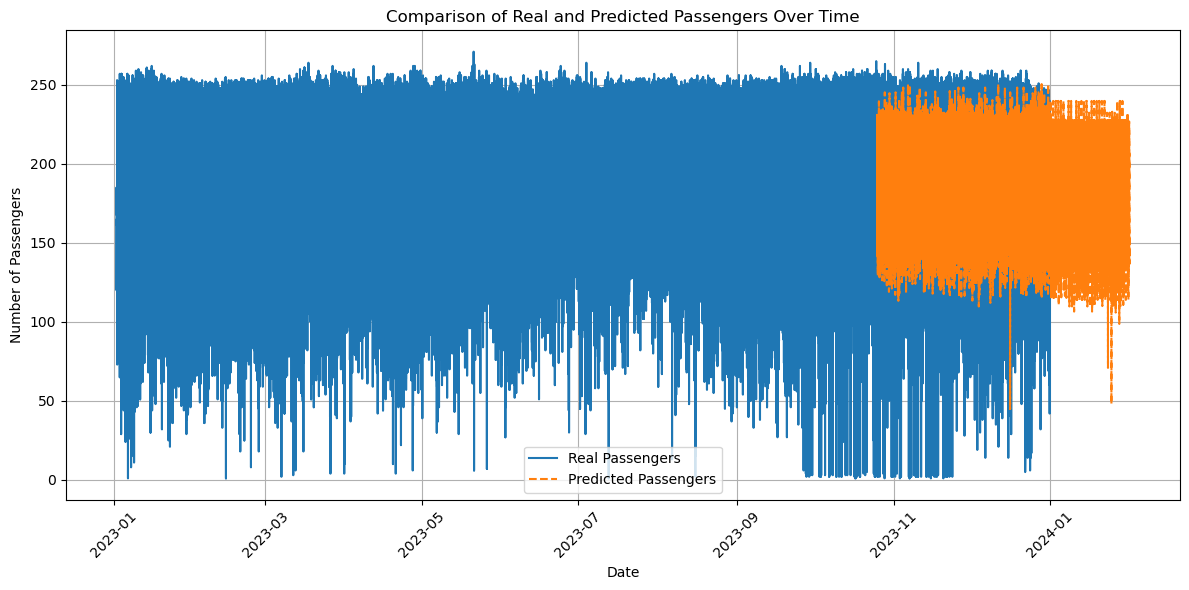

In [136]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_hourly['STD'], df_hourly['Passengers'], label='Real Passengers')
plt.plot(df_hourly['STD'], df_hourly['Predicted_Passengers'], label='Predicted Passengers', linestyle='--')
plt.title('Comparison of Real and Predicted Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor lectura
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot
plt.show()

#### por día

In [137]:
df_graph['STD'] = pd.to_datetime(df_graph['STD']).dt.date
df_graph = df_graph.groupby('STD')['Passengers', 'Predicted_Passengers'].sum().reset_index()
df_graph.sort_values('STD', inplace=True)
df_graph

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\1621321680.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_graph = df_graph.groupby('STD')['Passengers', 'Predicted_Passengers'].sum().reset_index()


,STD,Passengers,Predicted_Passengers
0,2023-10-25,29967.0,29355.645096
1,2023-10-26,71913.0,66302.577229
2,2023-10-27,75207.0,70279.842720
3,2023-10-28,62049.0,59507.461556
4,2023-10-29,68815.0,66946.690215
...,...,...,...
63,2023-12-27,70192.0,71632.350383
64,2023-12-28,68832.0,71478.355239
65,2023-12-29,74059.0,74667.765957
66,2023-12-30,63915.0,66002.668722


In [138]:
df_fut_graph['STD'] = pd.to_datetime(df_fut_graph['STD']).dt.date
df_fut_graph = df_fut_graph.groupby('STD')['Predicted_Passengers'].sum().reset_index()
df_fut_graph.sort_values('STD', inplace=True)
df_fut_graph

,STD,Predicted_Passengers
0,2024-01-01,68398.550407
1,2024-01-02,72359.400275
2,2024-01-03,72172.759042
3,2024-01-04,69415.566019
4,2024-01-05,72260.569482
...,...,...
26,2024-01-27,51073.155660
27,2024-01-28,60734.911974
28,2024-01-29,61737.050398
29,2024-01-30,52831.050971


In [139]:
df_train_graph['STD'] = pd.to_datetime(df_train_graph['STD']).dt.date
df_train_graph = df_train_graph.groupby('STD')['Passengers'].sum().reset_index()
df_train_graph.sort_values('STD', inplace=True)
df_train_graph

,STD,Passengers
0,2023-01-02,65154.0
1,2023-01-03,61768.0
2,2023-01-04,57829.0
3,2023-01-05,53524.0
4,2023-01-06,57095.0
...,...,...
292,2023-10-21,56326.0
293,2023-10-22,66952.0
294,2023-10-23,73168.0
295,2023-10-24,67078.0


In [140]:
df_daily = pd.concat([df_train_graph, df_graph, df_fut_graph], ignore_index=True)
df_daily

,STD,Passengers,Predicted_Passengers
0,2023-01-02,65154.0,NaN
1,2023-01-03,61768.0,NaN
2,2023-01-04,57829.0,NaN
3,2023-01-05,53524.0,NaN
4,2023-01-06,57095.0,NaN
...,...,...,...
391,2024-01-27,NaN,51073.155660
392,2024-01-28,NaN,60734.911974
393,2024-01-29,NaN,61737.050398
394,2024-01-30,NaN,52831.050971


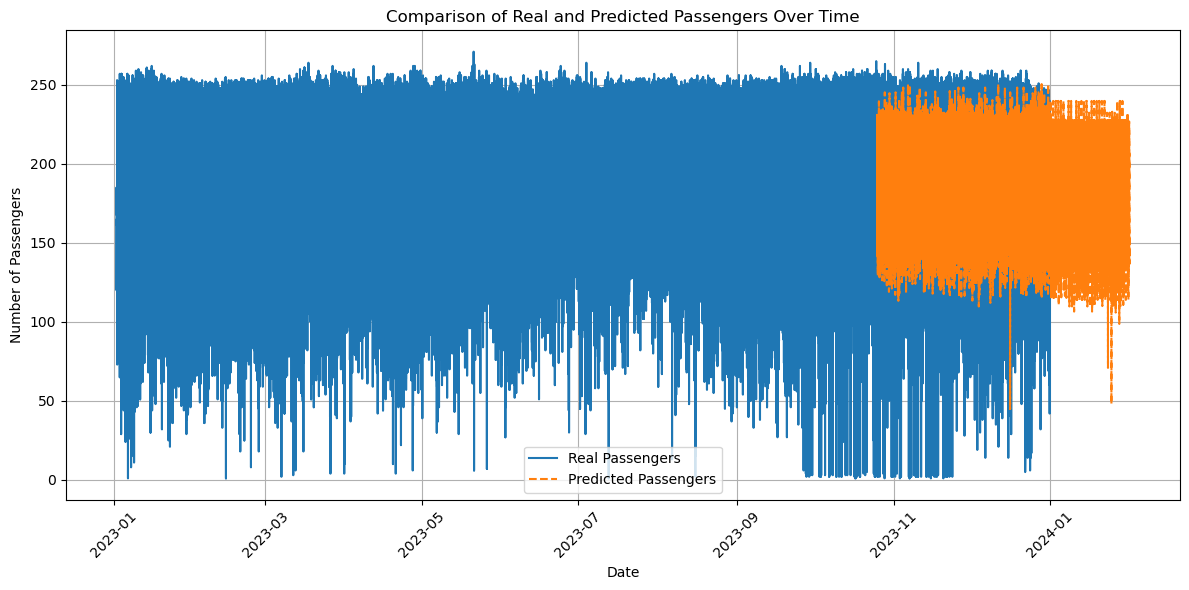

In [141]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_hourly['STD'], df_hourly['Passengers'], label='Real Passengers')
plt.plot(df_hourly['STD'], df_hourly['Predicted_Passengers'], label='Predicted Passengers', linestyle='--')
plt.title('Comparison of Real and Predicted Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor lectura
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot
plt.show()

### SARIMAX (Seasonal ARIMA with exogenous variables)

In [147]:
# Convertir las columnas de fecha a datetime si es necesario
df_arima = df.copy()
df_arima['STD'] = pd.to_datetime(df_arima['STD'])

# Asumiré que 'STD' es el índice temporal para ordenar los datos
df_arima = df_arima.set_index('STD')
df_arima

,STA,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa
STD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,2023-01-02 02:00:00,240,168.0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2023-01-02 00:00:00,2023-01-02 06:00:00,186,170.0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2023-01-02 00:00:00,2023-01-02 05:00:00,186,185.0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2023-01-02 00:00:00,2023-01-02 05:00:00,186,120.0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2023-01-02 01:00:00,2023-01-02 06:00:00,186,165.0,1,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:00:00,2024-01-01 04:00:00,186,131.0,23,4,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2023-12-31 23:00:00,2024-01-01 04:00:00,186,168.0,23,4,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [148]:
# Separar los datos en endógenos y exógenos
y = df_arima['Passengers']
X = df_arima.drop(['Passengers', 'STA'], axis=1)  # Eliminar STA y Passengers

cutoff = pd.to_datetime('2023-10-25')  # Ajusta esta fecha según tus datos
train_y = y[:cutoff]
test_y = y[cutoff:]
train_X = X[:cutoff]
test_X = X[cutoff:]

In [149]:
# Ajustar el modelo SARIMAX
model = sm.tsa.SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

print(results.summary())

c:\Users\axelm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\axelm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\axelm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                97585
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -461828.905
Date:                            Sat, 04 May 2024   AIC                         923863.810
Time:                                    20:48:21   BIC                         924841.110
Sample:                                         0   HQIC                        924160.725
                                          - 97585                                         
Covariance Type:                              opg                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Capacity                                 0.6894      0.004    

In [150]:
# Predicciones
predictions = results.predict(start=test_y.index[0], end=test_y.index[-1], exog=test_X)

rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

## modelos (entrenar con 2023 y predecir el futuro)

In [25]:
train_data = fdfm[fdfm['Passengers'].notna()]
test_data = fdfm[fdfm['Passengers'].isna()]

In [26]:
# Preparar los datos para el modelo
X_train = train_data.drop(['STD', 'STA', 'Passengers'], axis=1)
y_train = train_data['Passengers']
X_test = test_data.drop(['STD', 'STA', 'Passengers'], axis=1)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en los datos donde 'Passengers' es NaN
test_data['Predicted_Passengers'] = model.predict(X_test)

test_data

C:\Users\axelm\AppData\Local\Temp\ipykernel_21880\1169976980.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Passengers'] = model.predict(X_test)


,STD,STA,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa,Predicted_Passengers
2,2024-02-16 17:00:00,2024-02-16 17:00:00,220,NaN,17,17,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,172.617022
19,2024-01-12 08:00:00,2024-01-12 09:00:00,186,NaN,8,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,140.170033
22,2024-05-18 14:00:00,2024-05-18 16:00:00,180,NaN,14,16,0,5,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,159.619385
25,2024-03-18 10:00:00,2024-03-18 13:00:00,186,NaN,10,13,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,185.159592
26,2024-04-05 00:00:00,2024-04-05 04:00:00,240,NaN,0,4,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,186.825496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245744,2024-03-21 06:00:00,2024-03-21 10:00:00,186,NaN,6,10,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,148.008521
245746,2024-10-01 11:00:00,2024-10-01 15:00:00,186,NaN,11,15,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0

# productos

In [27]:
sales = pd.read_csv('C:\\Users\\axelm\\OneDrive\\Documentos\\python\\datathon_2024\\Sales TEC_Valid.csv')
sales

,Flight_ID,ProductType,ProductName,Quantity,TotalSales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0
...,...,...,...,...,...
2564356,638cf1904f936c50aea4a6f123ee07cf,Licores,Vino Tinto Sangre De Toro,1,155.0
2564357,04c5a19b8382a888d5c4c7b4932e783e,Licores,Vino Tinto Sangre De Toro,1,155.0
2564358,0291f6b201d2b24717a8ed7ca04f2d90,Licores,Vino Tinto Sangre De Toro,1,155.0
2564359,a10e3ac614fd434d6312897e07727c08,Licores,Vino Tinto Sangre De Toro,1,155.0


In [28]:
len(flights['Flight_ID'].unique())

238055

In [29]:
len(sales['Flight_ID'].unique())

108964